<a href="https://colab.research.google.com/github/DianaCorderoF/DCCF_PYCD/blob/main/Actividad_1_conteo_de_palabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 8.0 MB/s eta 0:00:00
Texto cargado del documento:
 The danger of a single story I’m a storyteller. And I would like to tell you a few personal stories about what I like to call “the danger of the single story.” I grew up on a university campus in eastern Nigeria. My mother says that I started reading at the age of two, although I think four is probably close to the truth. So I was an early reader, and what I read were British and American children’s books. I was also an early writer, and when I began to write, at about the age of seven, stories 


<ipython-input-2-2a9a54f534d3>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


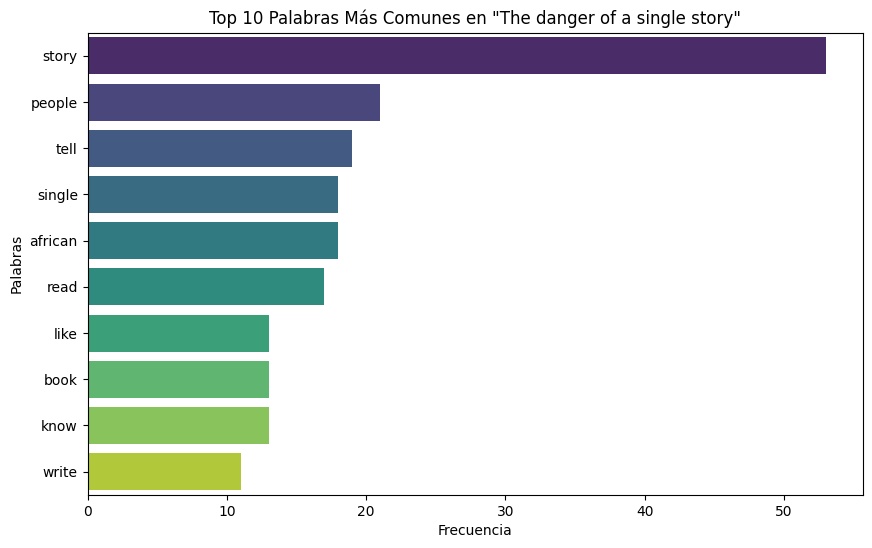

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Instalar las librerías necesarias
!pip install nltk python-docx

from docx import Document
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta de archivo THE DANGER OF A SINGLE STORY
file_path = '/content/drive/My Drive/PYCD_DCCF/The danger of a single story.docx'

def read_word_file(file_path):
    doc = Document(file_path)
    text = []
    for paragraph in doc.paragraphs:
        text.append(paragraph.text)
    return ' '.join(text)

# Cargar el modelo de lenguaje de spaCy
nlp = spacy.load("en_core_web_sm")

# lematización
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# contar palabras
def count_words(tokens):
    return Counter(tokens).most_common(10)  # Obtener las 10 palabras más comunes

# Cargar el texto del nuevo documento
text = read_word_file(file_path)
print("Texto cargado del documento:\n", text[:500])  # Muestra los primeros 500 caracteres

# Preprocesar el texto
tokens = preprocess_text_spacy(text)

# Contar palabras
common_words = count_words(tokens)

#  datos para la gráfica
words, counts = zip(*common_words)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='viridis')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 10 Palabras Más Comunes en "The danger of a single story"')
plt.show()